#### Gaussian Infer 1D

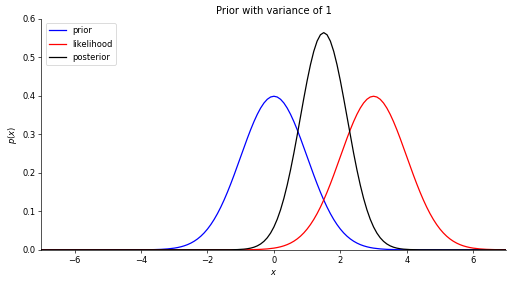

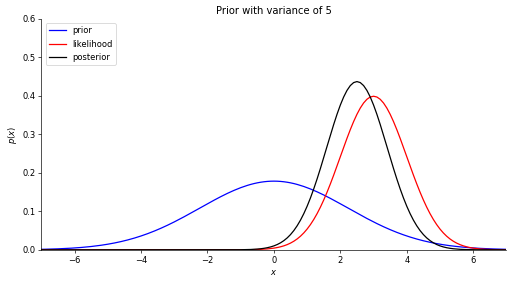

In [ ]:
import jax.numpy as jnp
from jax import random
from scipy.stats import multivariate_normal as mvn
import seaborn as sns
import matplotlib.pyplot as plt

def plot_data(quantiles, pdf_dict, variance_prior):
    fig = plt.figure(figsize=(10, 5), dpi=60)
    plt.ylim(0, 0.6) ; plt.xlim(-7, 7)
    # Plot graph
    for key, value in pdf_dict.items():
        plt.plot(quantiles, value["pdf"], color=value["color"], label=key,linestyle=value["linestyle"], linewidth=1.5)

    plt.title(f"Prior with variance of {variance_prior}")
    plt.xlabel("$x$")
    plt.ylabel("$p(x)$")
    plt.legend(loc="upper left")
    sns.despine()
    plt.show()

def generate_PDF(prior_var=[1, 5], prior_mean=[0, 0], observed_var=[1, 1],):
    ''' the noisy observation '''
    observed_val = 3

    ''' quantiles for data '''
    quantiles = jnp.arange(-10, 10, 0.10)

    for mean_prior, variance_prior, variance_observed in zip(prior_mean, prior_var, observed_var):
        ''' prior variance, mean and PDF '''
        prior_var = variance_prior
        prior_mu = mean_prior
        prior_pdf = mvn.pdf(quantiles, mean=prior_mu, cov=prior_var)

        ''' likelihood variance, mean and PDF '''
        likelihood_var = variance_observed
        likelihood_mu = jnp.mean(observed_val)
        likelihood_pdf = mvn.pdf(quantiles, mean=likelihood_mu, cov=likelihood_var)
        ''' number of noisy observations '''
        observed_val_count = jnp.size(observed_val)

        ''' Posterior variance, mean and PDF '''
        posterior_var = (likelihood_var * prior_var) /  ((observed_val_count * prior_var) + likelihood_var)
        posterior_mu = posterior_var * ((prior_mu / prior_var) + ((observed_val_count * likelihood_mu) / likelihood_var))
        posterior_pdf = mvn.pdf(quantiles, mean=posterior_mu, cov=posterior_var)

        ''' graph options '''
        pdf_plot_dict = {
            "prior": {"pdf": prior_pdf, "color": "blue", "linestyle": "-"},
            "likelihood": {"pdf": likelihood_pdf, "color": "red", "linestyle": "-"},
            "posterior": {"pdf": posterior_pdf, "color": "black", "linestyle": "-"},
        }
        plot_data(quantiles, pdf_plot_dict, variance_prior)

generate_PDF()

Robust pdf

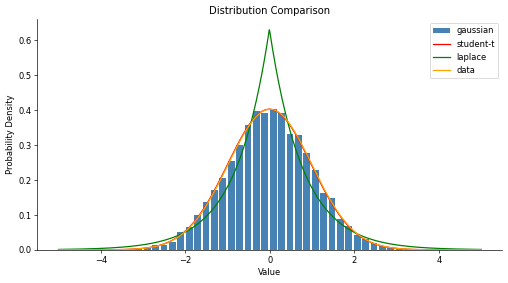

In [ ]:
from scipy.stats import norm, laplace, t

outlier_pos = 0
outliers = []
samples_norm_dist = 30
samples_graph_xaxis = 500
ranges_xaxis = [-5, 10]
ranges_yaxis = [0, 0.5]
norm_dist_sample = random.normal(random.PRNGKey(42), shape=(10000,))
x_axis = jnp.linspace(-5, 5, 1000)
samples = jnp.hstack((norm_dist_sample, jnp.array(outliers)))
fig, ax = plt.subplots(figsize=(10, 5), dpi=60)

samples = norm_dist_sample
ax.hist(
    np.array(norm_dist_sample),
    bins=40,
    density=True,
    color='steelblue',
    ec='steelblue',
    weights=np.ones(len(norm_dist_sample)) / len(norm_dist_sample),
    rwidth=0.8,
    label='Normal Distribution'
)

loc, scale = norm.fit(samples)
norm_pdf = norm.pdf(x_axis, loc=loc, scale=scale)

loc, scale = laplace.fit(samples)
laplace_pdf = laplace.pdf(x_axis, loc=loc, scale=scale)

# Fix: t.fit returns (df, loc, scale), so unpack into 3 variables.
# Assuming the first variable 'df_fitted' is the degrees of freedom.
df_fitted, loc, scale = t.fit(samples, floc=0)
studentT_pdf = t.pdf(x_axis, df_fitted, loc=loc, scale=scale)

ax.plot(x_axis, norm_pdf, color='red', label='Fitted Normal Distribution')
ax.plot(x_axis, laplace_pdf, color='green', label='Fitted Laplace Distribution')
ax.plot(x_axis, studentT_pdf, color='orange', label='Fitted Student-t Distribution')

ax.set_xlabel('Value')
ax.set_ylabel('Probability Density')
ax.set_title('Distribution Comparison')
ax.legend(('gaussian', 'student-t', 'laplace', 'data'))
sns.despine()
plt.show()